In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


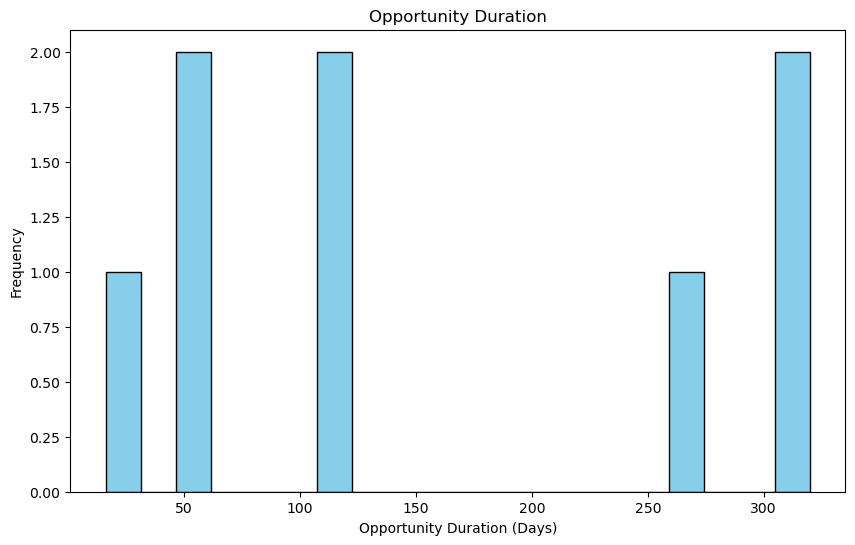

In [55]:
#1_A query that retrieves details about opportunities based on certain conditions like start_date

import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt


conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=**,
    database="Volunteer_match_making"
)

cursor = conn.cursor()

def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

query = """
SELECT
    O.OPP_ID,
    O.TITLE,
    O.DESCRIPTION,
    O.ORG_ID,
    Org.ORG_NAME,
    O.LOCATION,
    L.CITY,
    L.STATE,
    L.COUNTRY,
    O.TIME_PERIOD,
    TP.START_DATE,
    TP.END_DATE,
    O.SKILLS_REQUIRED,
    S.SKILLS_NAME
FROM
    OPPORTUNITY O
LEFT JOIN
    ORGANISATION Org ON O.ORG_ID = Org.ORG_ID
LEFT JOIN
    LOCATION L ON O.LOCATION = L.LOCATION_ID
LEFT JOIN
    TIME_PERIOD TP ON O.TIME_PERIOD = TP.TIME_ID
LEFT JOIN
    SKILLS S ON O.SKILLS_REQUIRED = S.SKILLS_ID
WHERE
    TP.START_DATE > '2023-01-01';
"""

data = execute_query(query)
cursor.close()
conn.close()

columns = ["OPP_ID", "TITLE", "DESCRIPTION", "ORG_ID", "ORG_NAME", "LOCATION", "CITY", "STATE", "COUNTRY", "TIME_PERIOD", "START_DATE", "END_DATE", "SKILLS_REQUIRED", "SKILLS_NAME"]
df = pd.DataFrame(data, columns=columns)
df['OPP_DURATION'] = (df['START_DATE'] - df['END_DATE']).dt.days

#Visualisation that shows frequency of opportunities and their durations
plt.figure(figsize=(10, 6))
plt.hist(df['OPP_DURATION'], bins=20, color='skyblue', edgecolor='black')
plt.title('Opportunity Duration')
plt.xlabel('Opportunity Duration (Days)')
plt.ylabel('Frequency')
plt.show()

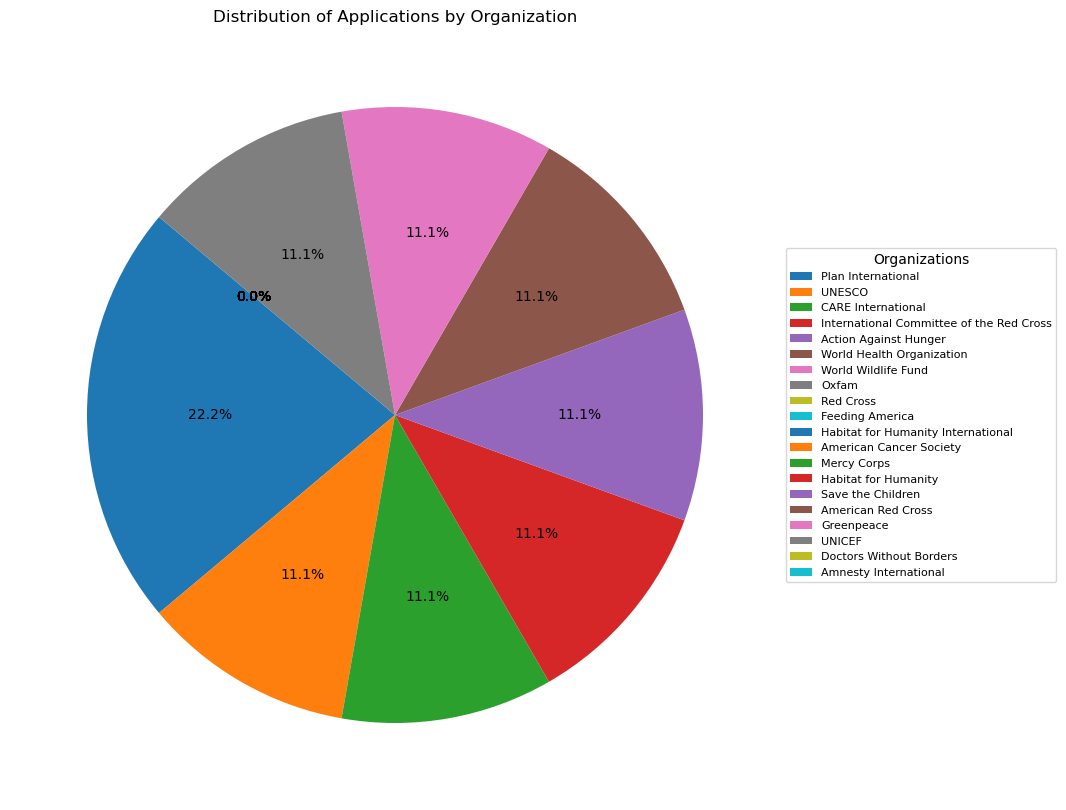

In [57]:
#2_Query retrieves the application count of each organisation

import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=**
    database="Volunteer_match_making"
)

cursor = conn.cursor()

def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

query = """
SELECT
    Org.ORG_NAME,
    (
        SELECT COUNT(A.APPLICATION_ID)
        FROM OPPORTUNITY O2
        LEFT JOIN APPLICATION A ON O2.OPP_ID = A.OPPORTUNITY_ID
        WHERE Org.ORG_ID = O2.ORG_ID
    ) AS ApplicationCount
FROM
    ORGANISATION Org
ORDER BY
    ApplicationCount DESC;
"""

data = execute_query(query)
cursor.close()
conn.close()

df = pd.DataFrame(data, columns=['ORG_NAME', 'ApplicationCount'])
plt.figure(figsize=(10, 10))
plt.pie(df['ApplicationCount'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Applications by Organization')

plt.legend(df['ORG_NAME'], title="Organizations", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

Result of the SQL query:
   ENGAGEMENT_ID TotalHoursWorked
0              4               20
1              6               18
2              7               25
3              8               30
4             10               22
5             12               28
6             15               21
7             16               27
8             18               19
9             19               23


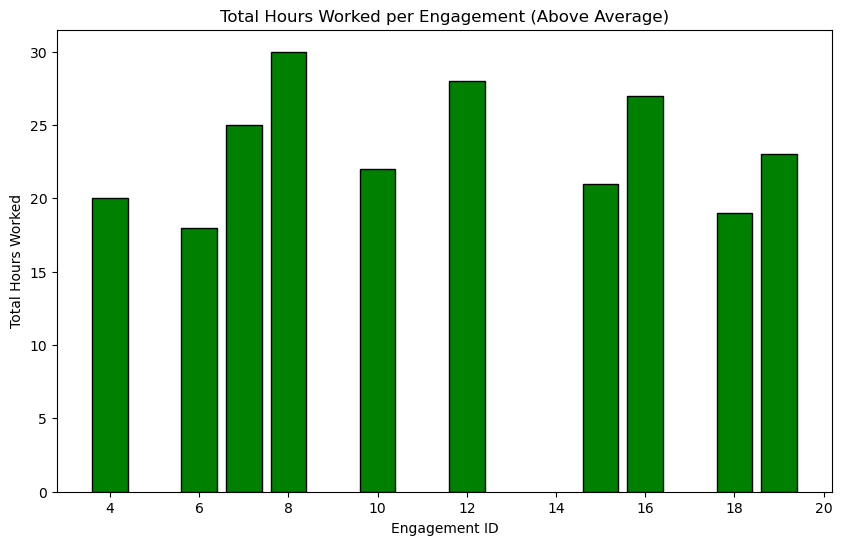

In [25]:
#3_the query identifies and retrieves 
#Engagements where the total hours worked exceed the average hours worked across all engagements.

import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=**
    database="Volunteer_match_making"  
)


cursor = conn.cursor()
def execute_query(query):
    cursor.execute(query)
    data = cursor.fetchall()
    return data

query = """
SELECT
    ENGAGEMENT_ID,
    SUM(HOURS_WORKED) AS TotalHoursWorked
FROM
    VOLUNTEER_HOURS
GROUP BY
    ENGAGEMENT_ID
HAVING
    SUM(HOURS_WORKED) > (SELECT AVG(HOURS_WORKED) FROM VOLUNTEER_HOURS);
"""


data = execute_query(query)

cursor.close()
conn.close()
columns = ["ENGAGEMENT_ID", "TotalHoursWorked"]
df = pd.DataFrame(data, columns=columns)

print("Result of the SQL query:")
print(df)

plt.figure(figsize=(10, 6))
plt.bar(df['ENGAGEMENT_ID'], df['TotalHoursWorked'], color='green', edgecolor='black')
plt.title('Total Hours Worked per Engagement (Above Average)')
plt.xlabel('Engagement ID')
plt.ylabel('Total Hours Worked')
plt.show()